# Car Price Prediction Model

In [6]:
# Import all relevant libraries
import warnings
warnings.filterwarnings('ignore')

from pyspark.sql import SparkSession
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt


# Load Data with Spark and Convert to Pandas

In [7]:
# Initialize Spark session
spark = SparkSession.builder.appName("CarPricePrediction").getOrCreate()

24/10/07 18:57:06 WARN Utils: Your hostname, MacBook-Pro-2.local resolves to a loopback address: 127.0.0.1; using 10.0.0.54 instead (on interface en0)
24/10/07 18:57:06 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/07 18:57:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [8]:
# Load the CSV file using Spark
spark_df = spark.read.csv('Resource/CarPrice_Assignment.csv', header=True, inferSchema=True)

In [9]:
# Convert the Spark DataFrame to Pandas DataFrame for further use with Scikit-learn
car_data = spark_df.toPandas()

24/10/07 18:57:11 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [10]:
# Close the Spark session after data retrieval
spark.stop()

# Data Cleaning and Preprocessing

In [11]:
# Check for duplicates and remove them if any
car_data.drop_duplicates(inplace=True)

In [12]:
# Check for null values
print(car_data.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [13]:
# Check data types to ensure everything is correct
print(car_data.dtypes)

car_ID                int32
symboling             int32
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int32
enginetype           object
cylindernumber       object
enginesize            int32
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int32
peakrpm               int32
citympg               int32
highwaympg            int32
price               float64
dtype: object


In [14]:
# Extract the brand name from the CarName column
car_data['brand'] = car_data['CarName'].apply(lambda x: x.split(' ')[0])

In [15]:
# Drop the original CarName column
car_data.drop(columns=['CarName'], inplace=True)

In [16]:
# One-hot encode the categorical columns
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand']
car_data_encoded = pd.get_dummies(car_data, columns=categorical_columns, drop_first=False, dtype=int)

In [17]:
# Display the shape and head of the cleaned data
print(car_data_encoded.shape)
print(car_data_encoded.head())

(205, 82)
   car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  ...  brand_porsche  brand_renault  \
0         130       3.47    2.68  ...              0              0   
1         130       3.47    2.68  ...              0              0   
2         152       2.68    3.47  ...              0              0   
3         109       3.19    3.40  ...              0              0   
4         136       3.19    3.40  ...              0              0   

   brand_saab  brand_subaru  brand_toyota  brand_toyouta  brand_vokswagen  \
0          

# Splitting Data, Scaling, and Normalization

In [18]:
# Define features (X) and target variable (y)
X = car_data_encoded.drop(columns=['car_ID', 'price'])
y = car_data_encoded['price']

In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Evaluation

In [21]:
# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [22]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [23]:
# Evaluate the model using R-squared test score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.6f}")

R-squared score: 0.956675


In [24]:
# Make predictions on the training set
y_pred_train = model.predict(X_train_scaled)

In [25]:
# Evaluate the model using R-squared training score
r2_train = r2_score(y_train, y_pred_train)
print(f"R-squared score: {r2_train:.6f}")

R-squared score: 0.984923


# Model Optimization Round 1

In [26]:
# Initialize Model 2
model_2 = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)
model_2.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [27]:
# Make predictions on the test set
y_pred_2 = model_2.predict(X_test_scaled)

In [28]:
# Evaluate the model using R-squared score
r2_2 = r2_score(y_test, y_pred_2)
print(f"R-squared score: {r2_2}")

R-squared score: 0.9590198707113329


In [29]:
# Make predictions on the training set
y_pred_2_train = model_2.predict(X_train_scaled)

In [30]:
# Evaluate the model using R-squared training score
r2_2_train = r2_score(y_train, y_pred_2_train)
print(f"R-squared score: {r2_2_train:.6f}")

R-squared score: 0.985990


# Model Optimization Round 2

In [31]:
# Create a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 1500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

In [32]:
# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1)

In [33]:
# Fit the model with grid search
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 1500]})

In [34]:
# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best R-squared training score: {grid_search.best_score_}")

Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 1500}
Best R-squared training score: 0.8907593856019271


In [35]:
# GridSearchCV prediction
y_pred_grid = grid_search.predict(X_test_scaled)

In [36]:
# Evaluate the model using R-squared score
r2_grid = r2_score(y_test, y_pred_grid)
print(f"R-squared test score: {r2_grid}")

R-squared test score: 0.9592298993893494


# Optimization Results

Model 1 (Initial model):
- Type: RandomForest
- R-squared: .9567
- n_estimators: 100

Model 2 (Optimization Round 1):
- Type: RandomForest
- R-squared: .9590
- n_estimators: 1000

Model 3 (Optimization Round 2):
- Type: GridSearch (RandomForest)
- R-squared: .9592
- Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 1500}

We went with Model 2. Model 3 was not significantly higher and took longer.

# Feature Importance and Answering Questions

In [37]:
# Get feature importances from the best model (model_2)
importances = model_2.feature_importances_
feature_names = X.columns

In [38]:
# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

In [39]:
# Set display option to show all columns
pd.set_option('display.max_rows', None)

# Display the features from most to least important
print("Ranking of Top 10 Features:")
print(importance_df.head(10))

Ranking of Top 10 Features:
       Feature  Importance
6   enginesize    0.589152
5   curbweight    0.242657
13  highwaympg    0.058220
10  horsepower    0.026768
3     carwidth    0.014706
2    carlength    0.009009
1    wheelbase    0.007918
55   brand_bmw    0.007717
12     citympg    0.006988
11     peakrpm    0.006038


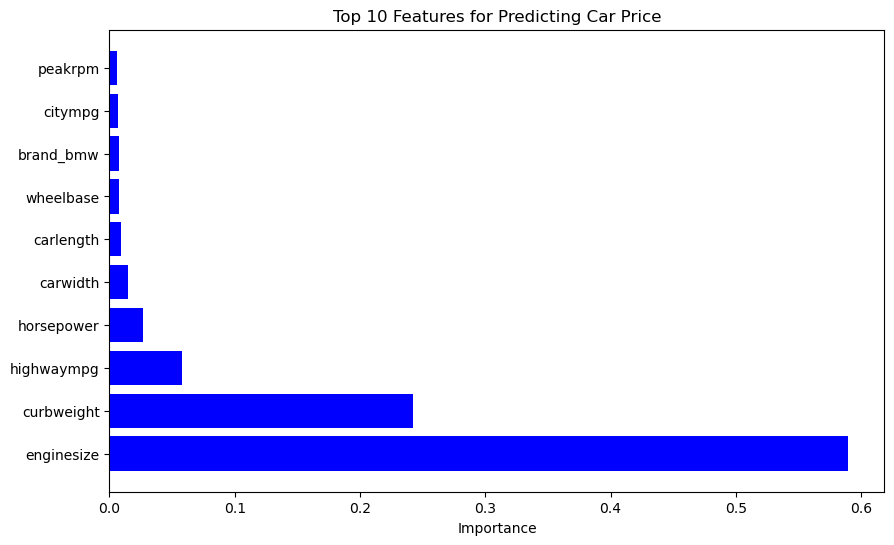

In [40]:
# Plot the top 10 features from importance_df
plt.figure(figsize=(10, 6))
plt.barh(importance_df.head(10)['Feature'], importance_df.head(10)['Importance'], color='blue')
plt.xlabel('Importance')
plt.title('Top 10 Features for Predicting Car Price')
# Save to images folder
plt.savefig('images/top_10_features_importance.png', bbox_inches='tight')
plt.show()

In [41]:
# Isolate technical specifications: engine size, horsepower, and fuel type
technical_features = importance_df[importance_df['Feature'].isin(['enginesize', 'horsepower'])]

# Fuel type might have multiple one-hot encoded columns (e.g., fueltype_gas)
fueltype_features = importance_df[importance_df['Feature'].str.contains('fueltype_')]

# Combine technical specifications and fuel type into a single DataFrame
technical_specifications = pd.concat([technical_features, fueltype_features])

# Display the importance values for technical specifications
print("Importance of Technical Specifications (Engine Size, Horsepower, Fuel Type):")
print(technical_specifications)

Importance of Technical Specifications (Engine Size, Horsepower, Fuel Type):
            Feature  Importance
6        enginesize    0.589152
10       horsepower    0.026768
14  fueltype_diesel    0.000079
15     fueltype_gas    0.000079


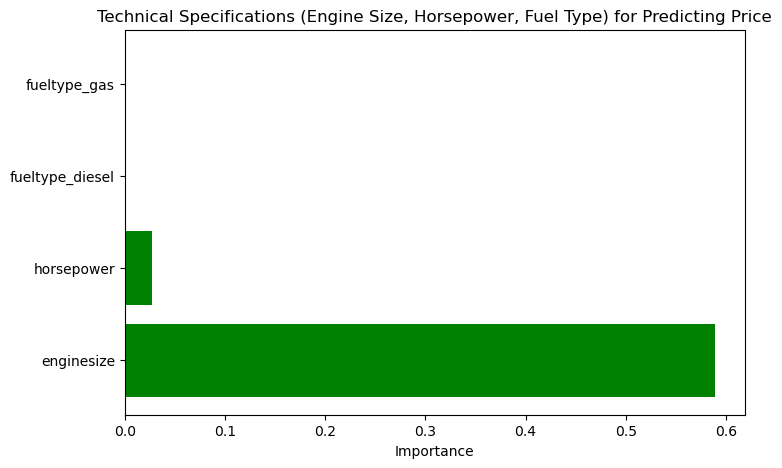

In [42]:
# Plot technical specification feature importance
plt.figure(figsize=(8, 5))
plt.barh(technical_specifications['Feature'], technical_specifications['Importance'], color='green')
plt.xlabel('Importance')
plt.title('Technical Specifications (Engine Size, Horsepower, Fuel Type) for Predicting Price')
# Save to images folder
plt.savefig('images/technical_specifications_importance.png', bbox_inches='tight')
plt.show()

In [43]:
# Isolate brand-related features and their importance values
brand_features = importance_df[importance_df['Feature'].str.contains('brand_')]
print("Importance of Car Brands:")
print(brand_features)

Importance of Car Brands:
              Feature    Importance
55          brand_bmw  7.716600e-03
54         brand_audi  5.155270e-04
70      brand_porsche  3.135966e-04
60        brand_isuzu  2.963626e-04
74       brand_toyota  2.531041e-04
78        brand_volvo  2.012472e-04
79           brand_vw  1.418807e-04
63        brand_mazda  1.225936e-04
65   brand_mitsubishi  1.113650e-04
66       brand_nissan  1.110865e-04
69     brand_porcshce  1.055753e-04
56        brand_buick  9.073573e-05
77   brand_volkswagen  9.052841e-05
73       brand_subaru  8.741451e-05
52       brand_Nissan  7.518127e-05
68     brand_plymouth  6.649269e-05
67      brand_peugeot  6.446383e-05
53  brand_alfa-romero  5.129668e-05
58        brand_dodge  4.448911e-05
59        brand_honda  2.772632e-05
72         brand_saab  2.605745e-05
71      brand_renault  2.100879e-05
61       brand_jaguar  1.368289e-05
57    brand_chevrolet  1.351644e-05
64      brand_mercury  1.338833e-05
62        brand_maxda  1.265721e-05
75

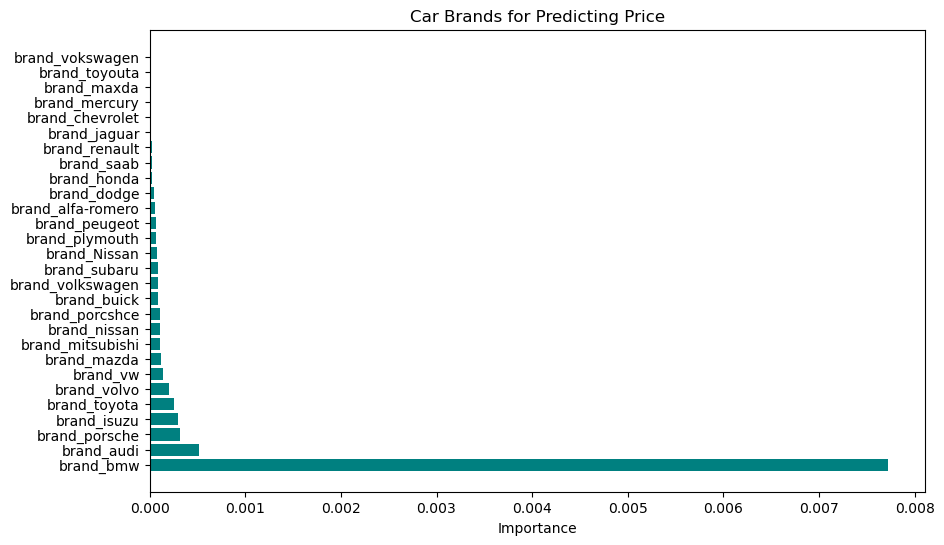

In [44]:
# Plot brand feature importance
plt.figure(figsize=(10, 6))
plt.barh(brand_features['Feature'], brand_features['Importance'], color='teal')
plt.xlabel('Importance')
plt.title('Car Brands for Predicting Price')
# Save to images folder
plt.savefig('images/brand_importance.png', bbox_inches='tight')
plt.show()

In [45]:
# Isolate fuel efficiency features and their importance values
fuel_efficiency_features = importance_df[importance_df['Feature'].isin(['citympg', 'highwaympg'])]
print("Importance of Fuel Efficiency (City MPG and Highway MPG):")
print(fuel_efficiency_features)

Importance of Fuel Efficiency (City MPG and Highway MPG):
       Feature  Importance
13  highwaympg    0.058220
12     citympg    0.006988


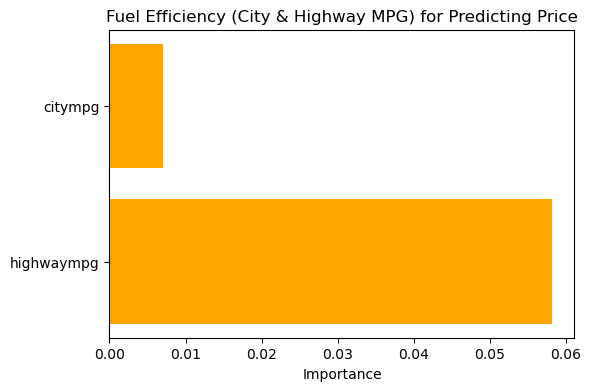

In [46]:
# Plot fuel efficiency feature importance
plt.figure(figsize=(6, 4))
plt.barh(fuel_efficiency_features['Feature'], fuel_efficiency_features['Importance'], color='orange')
plt.xlabel('Importance')
plt.title('Fuel Efficiency (City & Highway MPG) for Predicting Price')
# Save to images folder
plt.savefig('images/fuel_efficiency_importance.png', bbox_inches='tight')
plt.show()

In [47]:
# Isolate car body type features and their importance values
carbody_features = importance_df[importance_df['Feature'].str.contains('carbody_')]
print("Importance of Car Body Types:")
print(carbody_features)

Importance of Car Body Types:
                Feature  Importance
20  carbody_convertible    0.001000
22    carbody_hatchback    0.000900
23        carbody_sedan    0.000859
21      carbody_hardtop    0.000543
24        carbody_wagon    0.000259


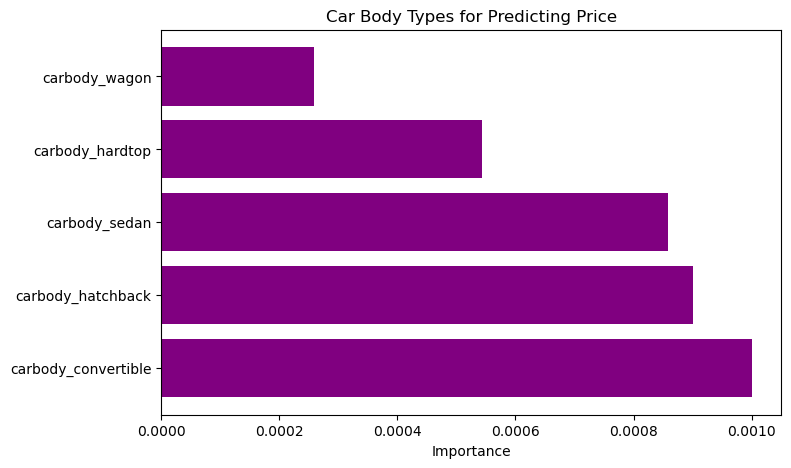

In [48]:
# Plot car body type feature importance
plt.figure(figsize=(8, 5))
plt.barh(carbody_features['Feature'], carbody_features['Importance'], color='purple')
plt.xlabel('Importance')
plt.title('Car Body Types for Predicting Price')
# Save to images folder
plt.savefig('images/carbody_importance.png', bbox_inches='tight')
plt.show()

## Correlation Matrix Heatmap

In [49]:
# Create dataframe with top 10 features
importance_df_top10 = importance_df.head(10)['Feature'].to_list()
importance_df_top10

['enginesize',
 'curbweight',
 'highwaympg',
 'horsepower',
 'carwidth',
 'carlength',
 'wheelbase',
 'brand_bmw',
 'citympg',
 'peakrpm']

In [50]:
# Compute the correlation matrix
correlation_matrix = car_data_encoded[importance_df_top10].corr()

In [51]:
# Set up the figure and axis
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

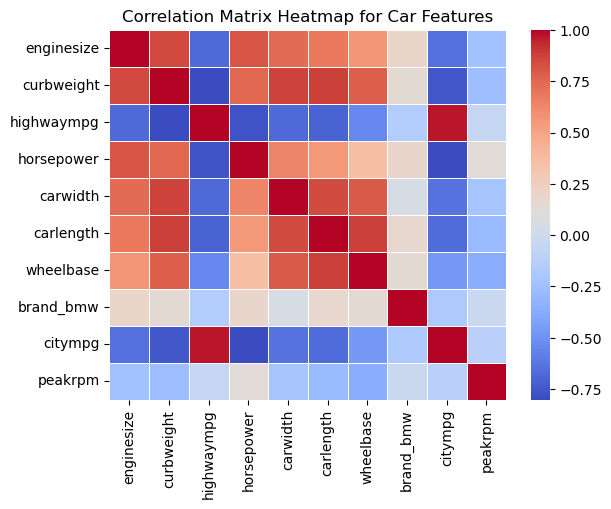

In [52]:
# Create the heatmap with Seaborn
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap for Car Features')
plt.savefig('images/correlation_matrix_heatmap.png', bbox_inches='tight')
plt.show()